In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from matplotlib import cm
import math
import pandas as pd
import scipy.stats as stats
from matplotlib import pylab
import mpl_toolkits.mplot3d

%matplotlib inline

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

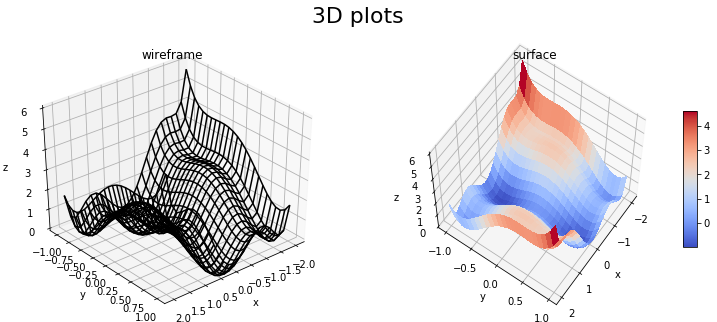

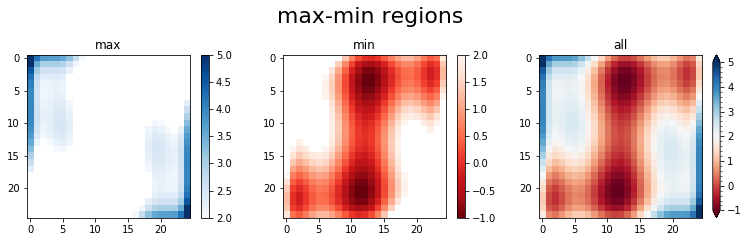

from "min" we see globally there are 2 global and 2 local minima
guess (x,y)=(0,0) -> [0. 0.] (stationary point)
global min (x,y)=(0,0.5) -> [-0.08984202  0.71265644]
local min (x,y)=(-1.5,-0.75) -> [-1.70360633  0.79608371]


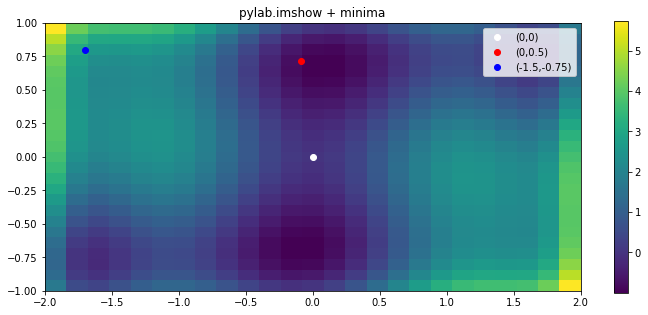

In [29]:
#six-hump camelback function definition
def f(x,y):
    return (4 - 2.1*x**2 + (x**4)/3) * x**2 + x*y + (4*y**2 - 4) * y**2

x = np.linspace(-2, 2, 25)
y = np.linspace(-1, 1, 25)
z = f(x, y)
X, Y = np.meshgrid(x, y) #returns coordinate matrices X and Y from coordinate vectors x and y
Z = f(X, Y)

#visualize 3D plots
fig = plt.figure(figsize=(13,5))
fig.suptitle('3D plots', fontsize=22)

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_wireframe(X, Y, Z, color='black') #3D wireframe
ax.set_title('wireframe')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_zlim([0,6])
ax.view_init(35, 50)

ax = fig.add_subplot(1, 2, 2, projection='3d')
s = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False) #3D surface
ax.set_title('surface')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_zlim([0,6])
ax.view_init(60, 35)
fig.colorbar(s, shrink=0.5, aspect=10)

plt.show()

#visualize max/min regions
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(13, 3), ncols=3)
fig.suptitle('max-min regions', x=0.5, y=1.1, fontsize=22)
Zpos = np.ma.masked_less(Z, 2) #mask for Z>2
Zneg = np.ma.masked_greater(Z, 2) #mask for Z<2

pos = ax1.imshow(Zpos, cmap='Blues', vmin=2, vmax=5) #Z>2 values area
fig.colorbar(pos, ax=ax1)
ax1.set_title('max')

neg = ax2.imshow(Zneg, cmap='Reds_r', vmin=-1, vmax=2) #Z<2 values area
fig.colorbar(neg, ax=ax2)
ax2.set_title('min')

both = ax3.imshow(Z, cmap='RdBu', vmin=-1, vmax=5) #all Z values area
cbar = fig.colorbar(both, ax=ax3, extend='both')
cbar.minorticks_on()
ax3.set_title('all')

plt.show()

#function global minima on pylab.imshow
def g(k):
    x = k[0]
    y = k[1]
    return (f(x,y)) #redefined 1 parameter function

min0_x = optimize.minimize(g, x0=[0, 0])
min1_x = optimize.minimize(g, x0=[0, 0.5])
min2_x = optimize.minimize(g, x0=[-1.5, -0.75])

print('from \"min" we see globally there are 2 global and 2 local minima')

print('guess (x,y)=(0,0) ->', min0_x.x, '(stationary point)')
print('global min (x,y)=(0,0.5) ->', min1_x.x)
print('local min (x,y)=(-1.5,-0.75) ->', min2_x.x)

plt.figure(figsize=(12,5))
pylab.imshow(Z, extent=[-2,2,-1,1])
plt.colorbar()
plt.title('pylab.imshow + minima')
plt.scatter(min0_x.x[0], min0_x.x[1], label='(0,0)', c='w')
plt.scatter(min1_x.x[0], min1_x.x[1], label='(0,0.5)', c='r')
plt.scatter(min2_x.x[0], min2_x.x[1], label='(-1.5,-0.75)', c='b')

plt.legend()
plt.show()


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

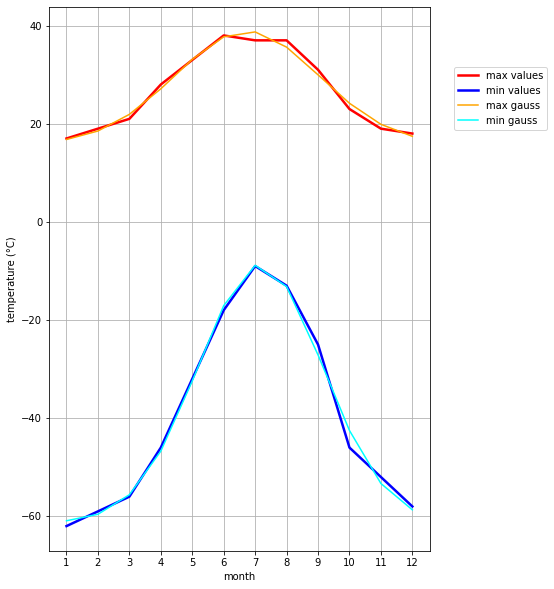

both fits seem reasonable 

gauss optimization:
value of max parameters is                    [132.80951067   6.73581644   2.29443639  15.77931557]
standard deviation error on max parameters is [14.27527981  0.07946768  0.16595943  1.17653378]
value of min parameters is                    [260.7638792    7.16452593   1.97590002 -61.320935  ]
standard deviation error on min parameters is [13.36267759  0.04720701  0.07598214  1.1888277 ] 

max gaussian is centered in mu_max 6.74 \pm 0.08
min gaussian is centered in mu_min 7.16 \pm 0.05
compatibility for mu_max and mu_min is 4.64 (not compatible)


In [34]:
tmaxs = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
tmins = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
months = [i+1 for i in range(12)]

#functions optimization
'''sine = lambda x, a, b, c: a * np.sin(x * b + c)
max_params_sin, max_cov_sin = optimize.curve_fit(sine, months, tmaxs)
min_params_sin, min_cov_sin = optimize.curve_fit(sine, months, tmins)'''

gauss = lambda x, c, mu, sigma, off: c * stats.norm.pdf(x, mu, sigma) + off
max_params_gaus, max_cov_gaus = optimize.curve_fit(gauss, months, tmaxs)
min_params_gaus, min_cov_gaus = optimize.curve_fit(gauss, months, tmins, [6,2,60, -60]) #parameters sets

plt.figure(figsize=(15,10))
'''plt.subplot(1,2,1)
plt.plot(months, tmaxs, label='max values', c='r', linewidth=2.5)
plt.plot(months, tmins, label='min values', c='b', linewidth=2.5)
plt.xlabel('month')
plt.xticks(months)
plt.ylabel('temperature (°C)')
plt.plot(months, sine(months, *max_params_sin), label='max sine', c='orange')
plt.plot(months, sine(months, *min_params_sin), label='min sine', c='cyan')
plt.grid()'''
plt.subplot(1,2,2)
plt.plot(months, tmaxs, label='max values', c='r', linewidth=2.5)
plt.plot(months, tmins, label='min values', c='b', linewidth=2.5)
plt.xlabel('month')
plt.xticks(months)
plt.ylabel('temperature (°C)')
plt.plot(months, gauss(months, *max_params_gaus), label='max gauss', c='orange')
plt.plot(months, gauss(months, *min_params_gaus), label='min gauss', c='cyan')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 0.9))
plt.show()

#results discussion
'''max_errs_sin=np.sqrt(np.diag(max_cov_sin))
min_errs_sin=np.sqrt(np.diag(min_cov_sin))'''
max_errs_gaus=np.sqrt(np.diag(max_cov_gaus))
min_errs_gaus=np.sqrt(np.diag(min_cov_gaus))

print('both fits seem reasonable \n')
'''print('sine optimization:')
print('value of max parameters is                   ', max_params_sin)
print('standard deviation error on max parameters is', max_errs_sin)
print('value of min parameters is                   ', min_params_sin)
print('standard deviation error on min parameters is', min_errs_sin)
print('max sine is centered in', "{:.2f}". format(max_params_sin[1]), '\pm', "{:.2f}". format(max_errs_sin[1]))
print('min sine is centered in', "{:.2f}". format(min_params_sin[1]), '\pm', "{:.2f}". format(min_errs_sin[1]), '\n')
'''
print('gaussian optimization:')
print('value of max parameters is                   ', max_params_gaus)
print('standard deviation error on max parameters is', max_errs_gaus)
print('value of min parameters is                   ', min_params_gaus)
print('standard deviation error on min parameters is', min_errs_gaus, '\n')

print('max gaussian is centered in mu_max', "{:.2f}". format(max_params_gaus[1]), '\pm', "{:.2f}". format(max_errs_gaus[1]))
print('min gaussian is centered in mu_min', "{:.2f}". format(min_params_gaus[1]), '\pm', "{:.2f}". format(min_errs_gaus[1]))
comp = (max_params_gaus[1]-min_params_gaus[1])/np.sqrt(max_errs_gaus[1]**2+min_errs_gaus[1]**2)
print('compatibility for mu_max and mu_min is', "{:.2f}". format(np.abs(comp)), '(not compatible)')

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

max residual is 11.32000000000005
min residual is -160.8499999999989 => a lot of outliers are outside histogram range


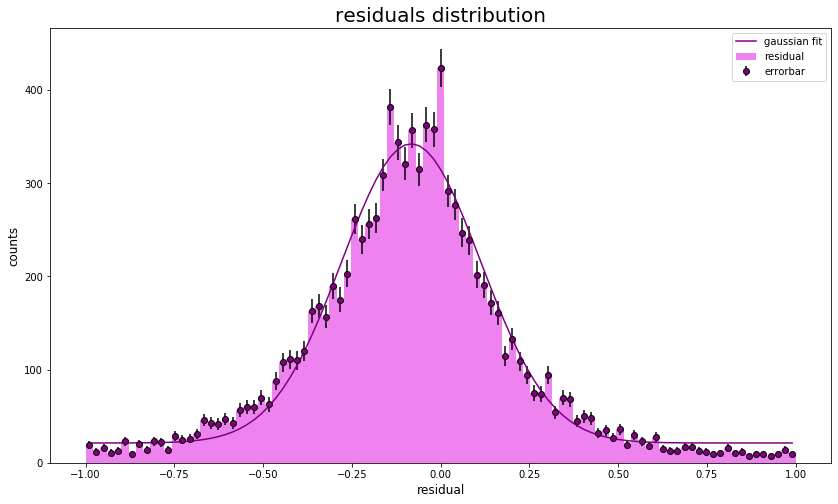

gaussian fit tested:
degrees of freedom = 98
chi2 = 29494.90735880774
p-value = 0.0 < 0.05
because of some little errors, the chi-squared is too high so the gaussian is not a satisfying fit function
ideas could be to try other functions or change width of the residuals data to be fitted


In [105]:
name = "/home/matteo/Scrivania/LaboratoryOfComputationalPhysics_Y4/residuals_261.npy"
file = np.load(name, allow_pickle=True, fix_imports=True)

#conversion to dataframe
data = file.tolist()
df = pd.DataFrame({'residuals':data['residuals'], 'distances':data['distances']})
df

#histogram
plt.figure(figsize=(14,8))
print('max residual is', data['residuals'].max())
print('min residual is', data['residuals'].min(), '=> a lot of outliers are outside histogram range')
bins = np.linspace(-1,1,100)
#data_restricted = df[np.abs(df['residuals'])<1]
counts, edges, plot = plt.hist(data['residuals'], bins, color='violet', label='residual')
#counts_rst, edges_rst, plot_rst = plt.hist(data_restricted['residuals'], bins_rst, color='violet')
plt.title('residuals distribution', fontsize=20)
plt.xlabel('residual', fontsize=12)
plt.ylabel('counts', fontsize=12)

#poisson uncertainty to bins
bins_centers = (edges[:-1] + edges[1:]) / 2
bins_centers_rst = (edges_rst[:-1] + edges_rst[1:]) / 2
bins_errs = np.sqrt(counts)
bins_errs_rst = np.sqrt(counts_rst)
plt.errorbar(bins_centers, counts, bins_errs, fmt='o', color='black', mfc='purple', label='errorbar')
#plt.errorbar(bins_centers_rst, counts_rst, bins_errs_rst, fmt='', color='', mfc='', label='')

#function to fit histogram
gauss = lambda x, a, b, c, d: a * np.exp(-(x-b)**2/c**2) + d
#other = lambda x, a, b      : a / (x**2-b)
#gauss = lambda x, c, mu, sigma, off: c * stats.norm.pdf(x, mu, sigma) + off
#poiss = lambda x, l, a, o: a * (l**x * np.exp(-l) / np.fact(x)) + o
#cauchy = lambda x, x0, gamma: 1 / (np.pi * gamma * (1+((x-x0)/gamma)**2))
fit_params, fit_cov = optimize.curve_fit(gauss, bins_centers, counts)
plt.plot(bins_centers, gauss(bins_centers, *fit_params), c='purple', label='gaussian fit')
plt.legend()
plt.show()

#p-value tests
ndof = len(bins_centers) - 1
a_hat, b_hat, c_hat, d_hat = fit_params
chisq = np.sum(((counts - a_hat * np.exp(-(bins_centers-b_hat)**2/c_hat**2) + d_hat)**2) / bins_errs)
pvalue = 1. - stats.chi2.cdf(chisq, ndof)
print('gaussian fit tested:')
print("degrees of freedom =", ndof)
print("chi2 =", chisq)
print("p-value =", pvalue, '< 0.05')
print('because of some little errors, the chi-squared is too high so the gaussian is not a satisfying fit function')
print('ideas could be to try other functions or change width of the residuals data to be fitted')

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

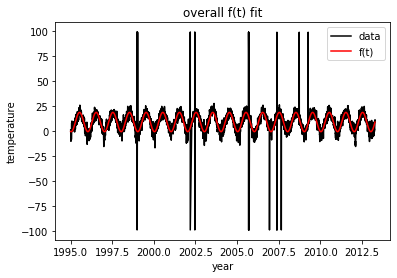

overall average temperature is 8.94190703859861 °C


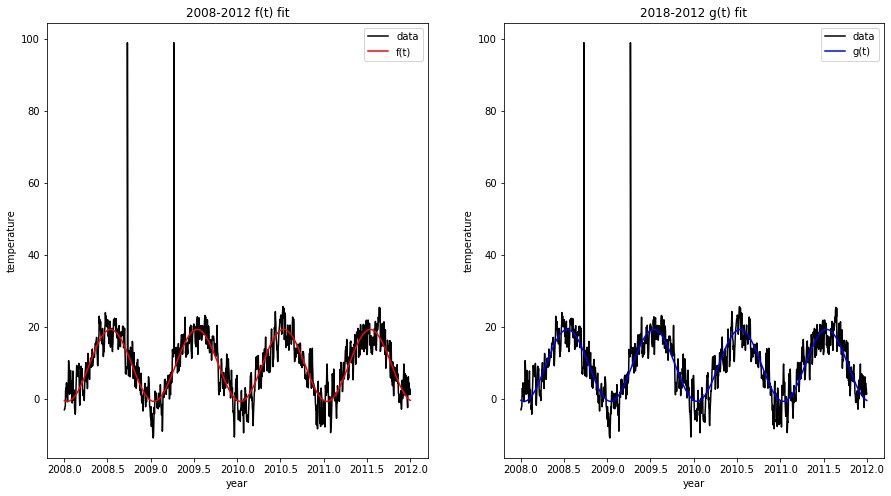

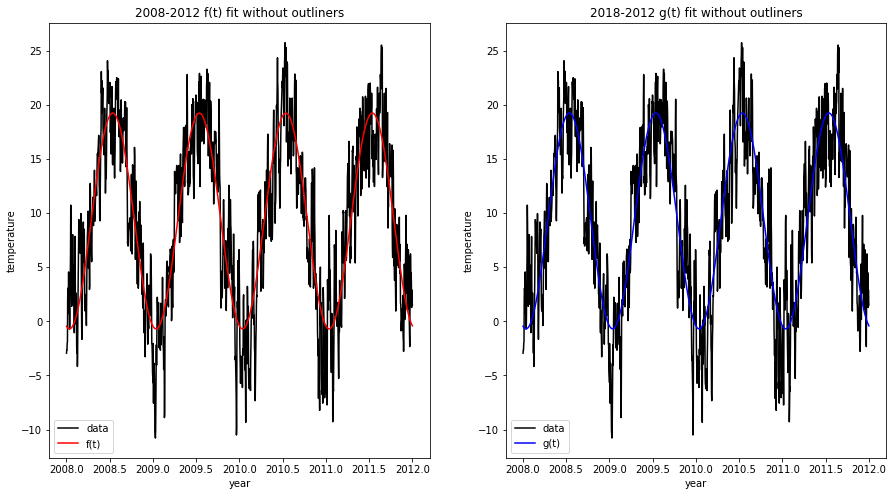

f(t) fit best fit values are: a = -9.99 b = 12.33 c = 9.38
g(t) fit best fit values are: a = -9.98 b = 1.00 c = -5.90 d = 9.40
f(t) fit best fit values without outliners are: a = -9.96 b = 12.33 c = 9.26
g(t) fit best fit values without outliners are: a = -9.96 b = 1.00 c = 8.63 d = 9.27 

average temperature in 2008-2012 is 9.38409773497604 °C
average temperature in 2008-2012 without outliners is 9.261252084167236 °C 

daily average predicted temperature for the coldest time of year: 24.882716666666667
daily average predicted temperature for the hottest time of year: -11.836421111111111 

physical meaning of "b" parameter is orizontal traslation in f and frequence regulation in g 

Fisher F-Test for the functions f and g:
CL: 0.880 , additional parameter necessary: NO


In [106]:
#loading data
txt_path = "/home/matteo/Scrivania/LaboratoryOfComputationalPhysics_Y4/munich_temperatures_average_with_bad_data.txt"
csv_path = "/home/matteo/Scrivania/LaboratoryOfComputationalPhysics_Y4/munich_temperatures_average_with_bad_data.csv"
txt_file = pd.read_csv(txt_path, sep=' ', header=None, names=['year', 'temperature'])
txt_file.to_csv(csv_path)
data = pd.read_csv(csv_path)
data = data.iloc[: , 1:]
data

#fit all data with function f
def f(t,a,b,c):
    return a * np.cos(2*np.pi*t+b) + c

f_widefit = optimize.curve_fit(f, data['year'], data['temperature'])
best_widef = f_widefit[0] #a,b,c

plt.plot(data['year'],data['temperature'], label='data', color='black')
plt.plot(data['year'], f(data['year'], best_widef[0], best_widef[1], best_widef[2]), label = 'f(t)', c='red')
plt.title('overall f(t) fit')
plt.xlabel('year')
plt.ylabel('temperature')

plt.legend()
plt.show()

print('overall average temperature is', data['temperature'].mean(), '°C')

#f(t) vs g(t) on restricted area
def g(t,a,b,c,d):
    return a * np.cos(2*np.pi*b*t+c) + d

mask = data[data['year']>2008]
somedata = mask[mask['year']<2012]

f_fit = optimize.curve_fit(f, somedata['year'], somedata['temperature'])
best_f = f_fit[0] #a,b,c
g_fit = optimize.curve_fit(g, somedata['year'], somedata['temperature'])
best_g = g_fit[0] #a,b,c,d

fig, (axf, axg) = plt.subplots(ncols=2, figsize=(15,8))

axf.plot(somedata['year'],somedata['temperature'], label='data', color='black')
axf.plot(somedata['year'], f(somedata['year'], best_f[0], best_f[1], best_f[2]), label = 'f(t)', c='red')
axf.set_title('2008-2012 f(t) fit')
axf.set_xlabel('year')
axf.set_ylabel('temperature')
axf.legend()
    
axg.plot(somedata['year'],somedata['temperature'], label='data', color='black')
axg.plot(somedata['year'], g(somedata['year'], best_g[0], best_g[1], best_g[2], best_g[3]), label = 'g(t)', c='blue')
axg.set_title('2018-2012 g(t) fit')
axg.set_xlabel('year')
axg.set_ylabel('temperature')
axg.legend()

plt.show()

#--------------------------------------same operations removing outliers---------------------------------------------------------------------------------
lower = somedata[somedata['temperature']>-50]
clean = lower[lower['temperature']<50]

#f(t) vs g(t) on restricted area
f_fit_wo = optimize.curve_fit(f, clean['year'], clean['temperature'])
best_f_wo = f_fit_wo[0] #a,b,c
g_fit_wo = optimize.curve_fit(g, clean['year'], clean['temperature'])
best_g_wo = g_fit_wo[0] #a,b,c,d

fig, (axf, axg) = plt.subplots(ncols=2, figsize=(15,8))

axf.plot(clean['year'],clean['temperature'], label='data', color='black')
axf.plot(clean['year'], f(clean['year'], best_f_wo[0], best_f_wo[1], best_f_wo[2]), label = 'f(t)', c='red')
axf.set_title('2008-2012 f(t) fit without outliners')
axf.set_xlabel('year')
axf.set_ylabel('temperature')
axf.legend()
    
axg.plot(clean['year'],clean['temperature'], label='data', color='black')
axg.plot(clean['year'], g(clean['year'], best_g_wo[0], best_g_wo[1], best_g_wo[2], best_g_wo[3]), label = 'g(t)', c='blue')
axg.set_title('2018-2012 g(t) fit without outliners')
axg.set_xlabel('year')
axg.set_ylabel('temperature')
axg.legend()

plt.show()

#best fits values obtained
print('f(t) fit best fit values are:', 
      'a =', "{:.2f}". format(best_f[0]),
      'b =', "{:.2f}". format(best_f[1]),
      'c =', "{:.2f}". format(best_f[2]))
print('g(t) fit best fit values are:', 
      'a =', "{:.2f}". format(best_g[0]),
      'b =', "{:.2f}". format(best_g[1]),
      'c =', "{:.2f}". format(best_g[2]),
      'd =', "{:.2f}". format(best_g[3]))
print('f(t) fit best fit values without outliners are:', 
      'a =', "{:.2f}". format(best_f_wo[0]),
      'b =', "{:.2f}". format(best_f_wo[1]),
      'c =', "{:.2f}". format(best_f_wo[2]))
print('g(t) fit best fit values without outliners are:', 
      'a =', "{:.2f}". format(best_g_wo[0]),
      'b =', "{:.2f}". format(best_g_wo[1]),
      'c =', "{:.2f}". format(best_g_wo[2]),
      'd =', "{:.2f}". format(best_g_wo[3]), '\n')

#calculation on temperatures
print('average temperature in 2008-2012 is', somedata['temperature'].mean(), '°C')
print('average temperature in 2008-2012 without outliners is', clean['temperature'].mean(), '°C', '\n')

tot = data[data['temperature']>-50]
tot = tot[tot['temperature']<50]
years = np.linspace(1995, 2012, 18)
upps, lows = [], []
for y in years:
    infy = tot[tot['year']>y]
    oney = infy[infy['year']<y+1]
    upps.append(oney.max())
    lows.append(oney.min())
uppsum, lowsum = 0, 0
for i in range(18):
    uppsum += upps[i][1]
    lowsum += lows[i][1]
print('daily average predicted temperature for the coldest time of year:', uppsum/18)
print('daily average predicted temperature for the hottest time of year:', lowsum/18, '\n')

print('physical meaning of \"b" parameter is orizontal traslation in f and frequence regulation in g \n')

#RSS for f and g on range 2008-2012
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

ssr_f = 0
f = f(clean['year'], best_f_wo[0], best_f_wo[1], best_f_wo[2])
ndof_f = len(best_f_wo)-1
for i,j in zip(f,clean['temperature']):
    ssr_f += (i-j)**2
ssr_g = 0
g = g(clean['year'], best_g_wo[0], best_g_wo[1], best_g_wo[2], best_g_wo[3])
ndof_g = len(best_g_wo)-1
for i,j in zip(g,clean['temperature']):
    ssr_g += (i-j)**2

print('Fisher F-Test for the functions f and g:')
f_vs_g = Ftest(ssr_f, ssr_g, ndof_f, ndof_g, len(clean), verbose=True)